# Machine Learning I - Practical I

Name: {}

Course: {}

This notebook provides you with the assignments and the overall code structure you need to complete the assignment. There are also questions that you need to answer in text form. Please use full sentences and reasonably correct spelling/grammar.

Regarding submission & grading:

- Work in groups of three and hand in your solution as a group.

- Solutions need to be uploaded to StudIP until the submission date indicated in the course plan. Please upload a copy of this notebook and a PDF version of it after you ran it.

- Solutions need to be presented to tutors in tutorial. Presentation dates are listed in the course plan. Every group member needs to be able to explain everything.

- You have to solve N-1 practicals to get admission to the exam.

- For plots you create yourself, all axes must be labeled. 

In [ ]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from copy import deepcopy

## The  dataset

The dataset consists of over 20.000 materials and lists their physical features. From these features, we want to learn how to predict the critical temperature, i.e. the temperature we need to cool the material to so it becomes superconductive. First load and familiarize yourself with the data set a bit.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
% cd gdrive/MyDrive/ml_2021

Mounted at /content/gdrive
/content/gdrive/MyDrive/ml_2021


In [ ]:
data = pd.read_csv('data/superconduct_train.csv')
print(data.shape)

(21263, 82)


In [ ]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,...,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,...,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,...,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1010.544286,718.152900,938.512777,1.305967,0.783207,810.6,739.575000,323.811808,355

Because the dataset is rather large, we prepare a small subset of the data as training set, and another subset as test set. To make the computations reproducible, we set the random seed.

In [ ]:
target_clm = 'critical_temp'  # the critical temperature is our target variable
n_trainset = 200  # size of the training set
n_testset = 500  # size of the test set

In [ ]:
# set random seed to make sure every test set is the same
np.random.seed(seed=1)

idx = np.arange(data.shape[0])
idx_shuffled = np.random.permutation(idx)  # shuffle indices to split into training and test set

test_idx = idx_shuffled[:n_testset]
train_idx = idx_shuffled[n_testset:n_testset+n_trainset]
train_full_idx = idx_shuffled[n_testset:]

X_test = data.loc[test_idx, data.columns != target_clm].values
y_test = data.loc[test_idx, data.columns == target_clm].values
print('Test set shapes (X and y)', X_test.shape, y_test.shape)

X_train = data.loc[train_idx, data.columns != target_clm].values
y_train = data.loc[train_idx, data.columns == target_clm].values
print('Small training set shapes (X and y):', X_train.shape, y_train.shape)

X_train_full = data.loc[train_full_idx, data.columns != target_clm].values
y_train_full = data.loc[train_full_idx, data.columns == target_clm].values
print('Full training set shapes (X and y):', X_train_full.shape, y_train_full.shape)

Test set shapes (X and y) (500, 81) (500, 1)
Small training set shapes (X and y): (200, 81) (200, 1)
Full training set shapes (X and y): (20763, 81) (20763, 1)


## Task 1: Plot the dataset

To explore the dataset, use `X_train_full` and `y_train_full` for two descriptive plots:

* **Histogram** of the target variable. Use `plt.hist`.

* **Scatterplots** relating the target variable to one of the feature values. For this you will need 81 scatterplots. Arrange them in one big figure with 9x9 subplots. Use `plt.scatter`. You may need to adjust the marker size and the alpha blending value. 

Furthermore, we need to normalize the data, such that each feature has a mean of zero mean and a variance of one. Implement a function `normalize` which normalizes the data. Print the means and standard variation of the first five features before and after.

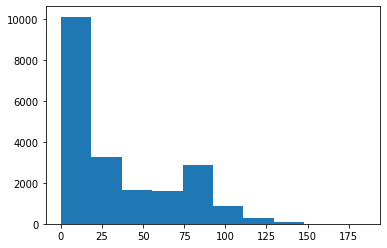

In [ ]:
# Histogram of the target variable
_ = plt.hist(y_train_full)

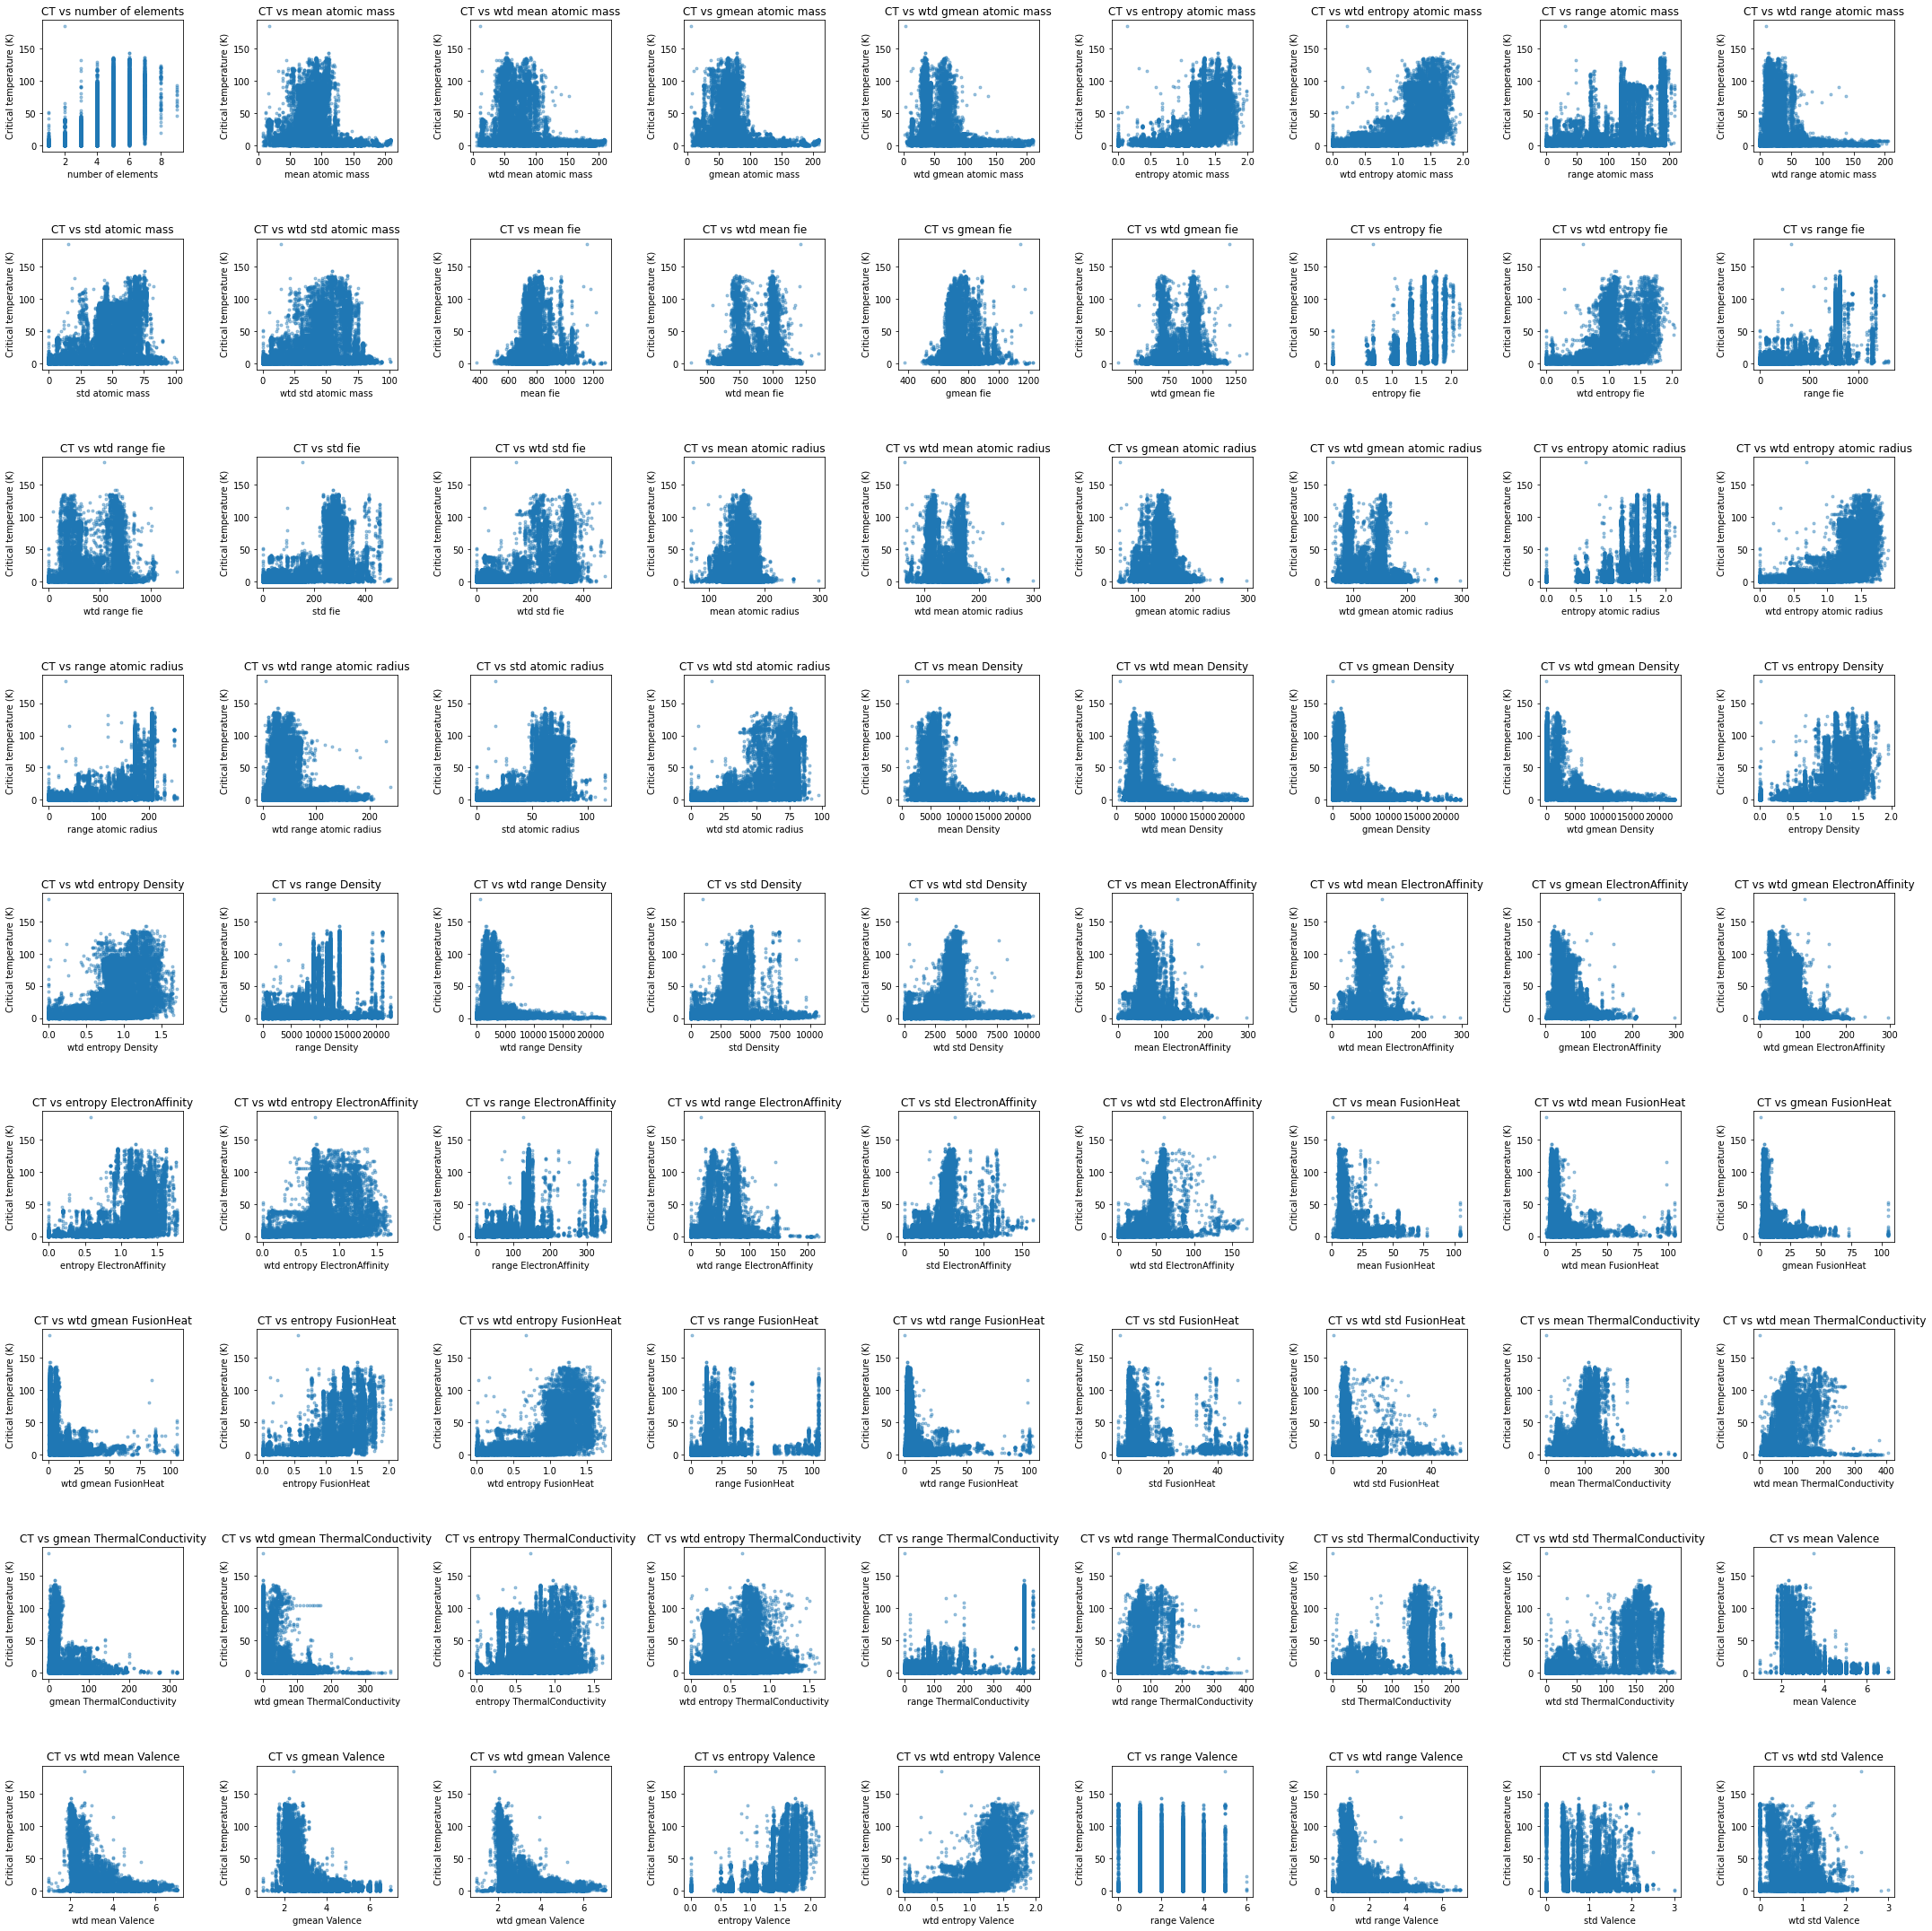

In [ ]:
# Scatter plots of the target variable vs. features
plt.figure(figsize=(30, 30))
#plt.subplots_adjust(hspace=0.5, wspace = 0.5) #space between plots
#plt.tight_layout()

squ = 9

var_names = data.columns.values.tolist()

for x in range(squ):
  for y in range(squ):
    k = x * squ + y
    plt.subplot(squ, squ, k+1) #subplot positioning
    _ = plt.scatter(X_train_full[:,k], y_train_full, marker = ".", alpha = 0.4)
    plt.title("CT vs " + var_names[k].replace("_", " "))
    plt.ylabel("Critical temperature (K)")
    plt.xlabel(var_names[k].replace("_", " "))
plt.tight_layout(h_pad = 5.0, w_pad=0.1)

In [ ]:
# Normalize
def normalize(data):
  cols = data.shape[1]

  #normdat = data
  normdat = deepcopy(data)

  for k in range(cols):
    mu = np.mean(normdat[:,k])
    sigma = np.std(normdat[:,k])

    normdat[:,k] = (normdat[:,k] - mu) / sigma
  
  return normdat

In [ ]:
X_train_norm = normalize(X_train)

In [ ]:
mus_a, mus_b, sigmas_a, sigmas_b = [], [], [], []

for i in range(5):
  mus_a.append(np.mean(X_train_norm[:,i]))
  mus_b.append(np.mean(X_train[:,i]))

  sigmas_a.append(np.std(X_train_norm[:,i]))
  sigmas_b.append(np.std(X_train[:,i]))

In [ ]:
print(np.round(mus_a, 5))
print(mus_b)
print(sigmas_a)
print(sigmas_b)
#everything worked

[ 0. -0. -0. -0.  0.]
[4.185, 87.71633360217524, 73.21230300793641, 71.15119648685723, 58.43925604980193]
[0.9999999999999999, 1.0, 1.0, 1.0, 1.0]
[1.5102234933942724, 29.24216733759368, 31.443899465243085, 30.725859874747538, 34.87710465494954]


In [ ]:
#actually normalize X_train now
X_train = normalize(X_train)
X_test = normalize(X_test)
X_train_full = normalize(X_train_full)

Which material properties may be useful for predicting superconductivity? What other observations can you make?

When evaluating the grid, we look for plots that show a small spread in the critical temperature (CT) for all values of the respective  material property it's plotted against. This is because a given value of the predictor would then allow us to make a precise prediciton for the outcome. Here, we however observe that for all variables in the data, the CT takes on a large spread for at least some values of that variable/predictor. There are some variables for which the spread of the CT is smaller at some of its values - e.g. for the variable "wtd entropy atomic radius" we observe that the observations with small of values tend to have smaller CT values as well (similar relations can be stated for several variables describing the atomic radius), making these variables with at least some predictive power.

Overall, though, we observe that guessing ~0K as the CT is correct a lot of times.

## Task 2:  Implement your own OLS estimator

We want to use linear regression to predict the critical temperature. Implement the ordinary least squares estimator without regularization 'by hand':

$w = (X^TX)^{-1}X^Ty$

To make life a bit easier, we provide a function that can be used to plot regression results. In addition it computes the mean squared error and the squared correlation between the true and predicted values. 

In [ ]:
def plot_regression_results(y_test, y_pred, weights):
    '''Produces three plots to analyze the results of linear regression:
        -True vs predicted
        -Raw residual histogram
        -Weight histogram

    Inputs:
        y_test: (n_observations,) numpy array with true values
        y_pred: (n_observations,) numpy array with predicted values
        weights: (n_weights) numpy array with regression weights'''

    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('r^2: ', r2_score(y_test, y_pred))

    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    # predicted vs true
    ax[0].scatter(y_test, y_pred)
    ax[0].set_title('True vs. Predicted')
    ax[0].set_xlabel('True %s' % (target_clm))
    ax[0].set_ylabel('Predicted %s' % (target_clm))

    # residuals
    error = np.squeeze(np.array(y_test)) - np.squeeze(np.array(y_pred))
    ax[1].hist(np.array(error), bins=30)
    ax[1].set_title('Raw residuals')
    ax[1].set_xlabel('(true-predicted)')

    # weight histogram
    ax[2].hist(weights, bins=30)
    ax[2].set_title('weight histogram')

    plt.tight_layout()

As an example, we here show you how to use this function with random data. 

MSE:  2640.432578444892
r^2:  -1.108062856115481


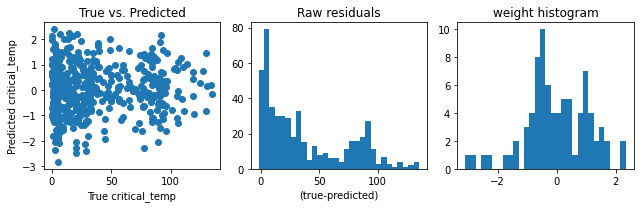

In [ ]:
# weights is a vector of length 82: the first value is the intercept (beta0), then 81 coefficients
weights = np.random.randn(82)

# Model predictions on the test set
y_pred_test = np.random.randn(y_test.size)

plot_regression_results(y_test, y_pred_test, weights)

Implement OLS linear regression yourself. Use `X_train` and `y_train` for estimating the weights and compute the MSE and $r^2$ from `X_test`. When you call our plotting function with the regession result, you should get mean squared error of 707.8.

In [ ]:
def OLS_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    N = X_train.shape[0]
    Ntst = X_test.shape[0]

    #add offset column
    X = np.append(np.ones((N,1)), X_train, axis = 1)
    Xtst = np.append(np.ones((Ntst,1)), X_test, axis = 1)

    Xt = np.transpose(X) #X'
    tmp = np.matmul(Xt, X)  #(X'X)
    P = np.matmul(np.linalg.inv(tmp), Xt) #(X'X)^-1 * X'

    weights = np.matmul(P, y_train) #Py

    y_pred = np.matmul(Xtst, weights) 

    # ---------------- END CODE -------------------------

    return weights, y_pred

MSE:  707.8008844972304
r^2:  0.43490745936293695


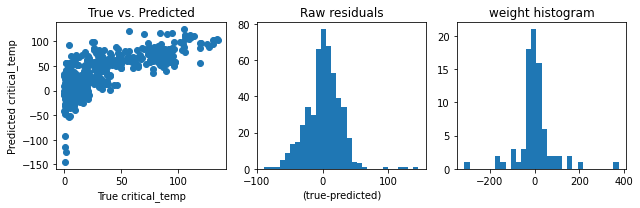

In [ ]:
# Plots of the results
weights, y_pred = OLS_regression(X_test, X_train, y_train)
plot_regression_results(y_test, y_pred, weights)

What do you observe? Is the linear regression model good?


The weight histogram shows that most of the weights (or coefficients) are near zero, which is a possible indication that they have no strong linear influence on the critical temperature (this could also possibly be a scaling issue). However, there are still quite a few predictors that are assigned non-zero weights, indicating that they do have strong predictive power in the linear model. The plot of the true vs. predicted values shows an anomaly: our model is predicting values below zero, which is outside the possible range of values for the critical temperature. Furthmore, it makes very few predictions above 100, even though there are observations in the data with such a high value for the critical temperature. The linear model thus has problems making predictions for observations that have a high true value and especially for those that have a low true value. In a model with perfect predictive power, we would want all of our points to lie on a 45 degree line in this plot. When disregarding the points that have a predicted temperature below zero, we can see that quite a few of the points lie on or somewhere near this 45 degree line (even though this is hard to tell with alpha set to 1). However, the histogram of the raw residuals supports this assumption, showing that most residuals are very small. To sum up, the linear model is not perfect, but seems to be better than just random guessing.

## Task 3: Compare your implementation to sklearn

Now, familarize yourself with the sklearn library. In the section on linear models:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

you will find `sklearn.linear_model.LinearRegression`, the `sklearn` implementation of the OLS estimator. Use this sklearn class to implement OLS linear regression. Again obtain estimates of the weights on `X_train` and `y_train` and compute the MSE and $r^2$ on `X_test`.


In [ ]:
def sklearn_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization using the sklearn library on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------
    reg = linear_model.LinearRegression().fit(X_train, y_train)

    tmp = np.transpose(reg.coef_)
    weights = np.insert(tmp, 0, reg.intercept_)

    y_pred = reg.predict(X_test)

    # ---------------- END CODE -------------------------

    return weights, y_pred

MSE:  707.800884505987
r^2:  0.4349074593559459


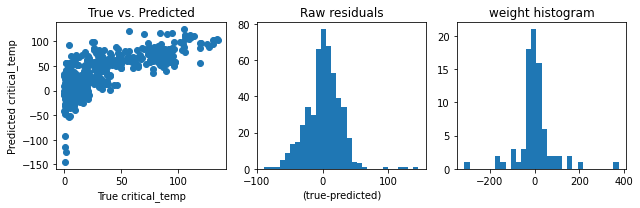

In [ ]:
weights, y_pred = sklearn_regression(X_test, X_train, y_train)
plot_regression_results(y_test, y_pred, weights)

If you implemented everything correctly, the MSE is again 707.8.

Fit the model using the larger training set, `X_train_full` and `y_train_full`, and again evaluate on `X_test`.

MSE:  340.8728213881201
r^2:  0.7278546934719319


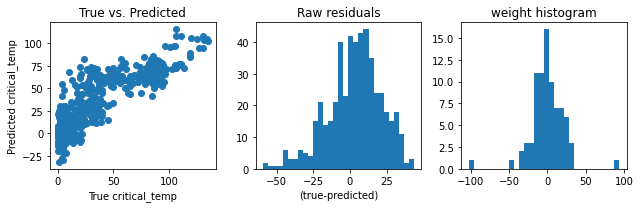

In [ ]:
weights, y_pred = sklearn_regression(X_test, X_train_full, y_train_full)
plot_regression_results(y_test, y_pred, weights)

 How does test set performance change? What else changes?

The test set performance has improved drastically. The MSE went down to 340.9 (from 707.6). Furthmore, one can see in the true vs. predicted graph that the model seems to make far less "nonsensical" predictions below 0 and that all other points also lie more closely to the ideal 45 degree line. This observation is also supported by the histogram of the raw resiudals, which shows that most residuals have now moved closer to zero. The largest residuals are now around an absolute value of 50, as opposed to 100 before. The weight histogram shows that most weights are still near 0 and that the few large coefficients have also become smaller - this might be because in the small training data, there could have been a few outlier observations that drastically influenced the coefficients and pushed them to high values.

## Task 4: Regularization with ridge regression

We will now explore how a penalty term on the weights can improve the prediction quality for finite data sets. Implement the analytical solution of ridge regression 

$w = (X^TX + \alpha I_D)^{-1}X^Ty$


as a function that can take different values of $\alpha$, the regularization strength, as an input. In the lecture, this parameter was called $\lambda$, but this is a reserved keyword in Python.

In [ ]:
def ridge_regression(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha
       on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    N = X_train.shape[0]
    Ntst = X_test.shape[0]

    #add offset column
    X = np.append(np.ones((N,1)), X_train, axis = 1)
    Xtst = np.append(np.ones((Ntst,1)), X_test, axis = 1)

    Xt = np.transpose(X) #X'
    tmp = np.matmul(Xt, X) + alpha * np.identity(X_train.shape[1]+1) #+1 because of intercept

    P = np.matmul(np.linalg.inv(tmp), Xt) #(X'X)^-1 * X'

    weights = np.matmul(P, y_train) #Py

    y_pred = np.matmul(Xtst, weights) 


    # ---------------- END CODE -------------------------

    return weights, y_pred

Run the ridge regression on `X_train` with an alpha value of 10 and plot the obtained weights.

MSE:  428.0979635869609
r^2:  0.6582160729330719


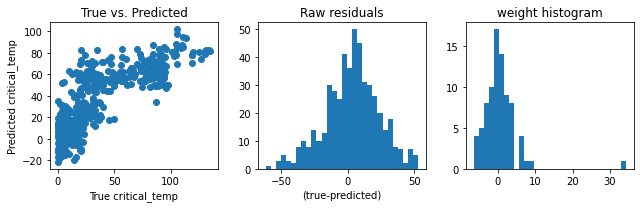

In [ ]:
# Run ridge regression with alpha=10
weights, y_pred = ridge_regression(X_test, X_train, y_train, 10)

# Plot regression results
plot_regression_results(y_test, y_pred, weights)

Now test a range of log-spaced $\alpha$s (~10-20), which cover several orders of magnitude, e.g. from 10^-7 to 10^7. 

* For each $\alpha$, you will get one model with one set of weights. 
* For each model, compute the error on the test set. 

Store both the errors and weights of all models for later use. You can use the function `mean_squared_error` from sklearn (imported above) to compute the MSE.


In [ ]:
alphas = np.logspace(-7, 7, 100)

MSE_alphas = []
weights_alphas = []

# ---------------- INSERT CODE ----------------------
for al in alphas:
  weights, y_pred = ridge_regression(X_test, X_train, y_train, al)
  mse_al = mean_squared_error(y_test, y_pred)

  MSE_alphas.append(mse_al)
  weights_alphas.append(weights)
# ---------------- END CODE -------------------------

Make a single plot that shows for each coefficient how it changes with $\alpha$, i.e. one line per coefficient. Also think about which scale is appropriate for your $\alpha$-axis. You can set this using `plt.xscale(...)`.

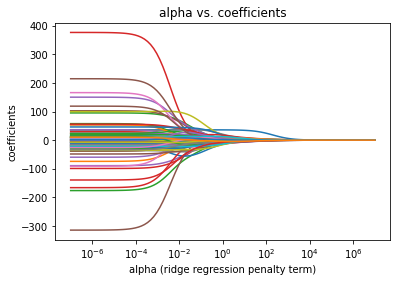

In [ ]:
# Plot of coefficients vs. alphas
weights = np.squeeze(np.array(weights_alphas))

for i in range(weights.shape[1]):
  plt.plot(alphas, weights[:,i])
plt.xlabel("alpha (ridge regression penalty term)")
plt.ylabel("coefficients")
plt.title("alpha vs. coefficients")
plt.xscale("log")

Why are the values of the weights largest on the left? Do they all change monotonically? 

The values of the weights are largest on the left because the $\alpha$ value on the left is smallest and therefore large weight values are not as heavy penalised. Certain values do not change monotonically but go from $\lt 0$ to $\gt 0$ before converging finally to 0.


Plot how the performance (i.e. the error) changes as a function of $\alpha$. As a sanity check, the MSE value for very small $\alpha$s should be close to the test-set MSE of the unregularized solution, i.e. 708.

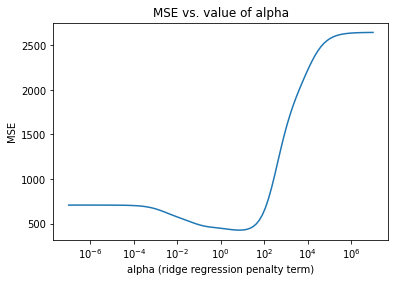

In [ ]:
# Plot of MSE  vs. alphas
_ = plt.plot(alphas, MSE_alphas)
plt.xlabel("alpha (ridge regression penalty term)")
plt.ylabel("MSE")
plt.title("MSE vs. value of alpha")
plt.xscale("log")

Which value of $\alpha$ gives the minimum MSE? Is it better than the unregularized model? Why should the curve reach ~700 on the left?

The minimum MSE is reached an $\alpha$ of somewhere between 10 and 100, where the mean squared error is just below 500. Therefore it is better than the MSE of the unregularized model of around 700. 

We also see that (as expected) the unregularized model has an MSE of ~700 in the plot.

Now implement the same model using sklearn. Use the `linear_model.Ridge` object to do so.


In [ ]:
def ridge_regression_sklearn(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha using the sklearn
       library on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------

    reg = linear_model.Ridge(alpha = alpha).fit(X_train, y_train)

    tmp = np.transpose(reg.coef_)
    weights = np.insert(tmp, 0, reg.intercept_) #insert in first position for comparability

    y_pred = reg.predict(X_test)
    # ---------------- END CODE -------------------------

    return weights, y_pred

This time, only plot how the performance changes as a function of $\alpha$. 

In [ ]:
# Plot of MSE  vs. alphas
MSE_alphas = []

for al in alphas:
  weights, y_pred = ridge_regression_sklearn(X_test, X_train, y_train, al)
  mse_al = mean_squared_error(y_test, y_pred)

  MSE_alphas.append(mse_al)

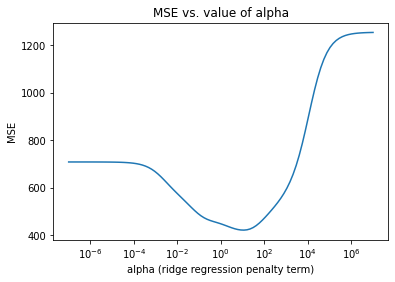

In [ ]:
# Plot of MSE  vs. alphas
_ = plt.plot(alphas, MSE_alphas)
plt.xlabel("alpha (ridge regression penalty term)")
plt.ylabel("MSE")
plt.title("MSE vs. value of alpha")
plt.xscale("log")

Note: Don't worry if the curve is not exactly identical to the one you got above. The loss function we wrote down in the lecture  has $\alpha$ defined a bit differently compared to sklearn. However, qualitatively it should look the same.

Yup, looks about the same.

## Task 5: Cross-validation

Until now, we always estimated the error on the test set directly. However, we typically do not want to tune hyperparameters of our inference algorithms like $\alpha$ on the test set, as this may lead to overfitting. Therefore, we tune them on the training set using cross-validation. As discussed in the lecture, the training data is here split in `n_folds`-ways, where each of the folds serves as a held-out dataset in turn and the model is always trained on the remaining data. Implement a function that performs cross-validation for the ridge regression parameter $\alpha$. You can reuse functions written above.

In [ ]:
def ridgeCV(X, y, n_folds, alphas):
    '''Runs a n_fold-crossvalidation over the ridge regression parameter alpha.
       The function should train the linear regression model for each fold on all values of alpha.

      Inputs:
        X: (n_obs, n_features) numpy array - predictor
        y: (n_obs,) numpy array - target
        n_folds: integer - number of CV folds
        alphas: (n_parameters,) - regularization strength parameters to CV over

      Outputs:
        cv_results_mse: (n_folds, len(alphas)) numpy array, MSE for each cross-validation fold

      Note:
        Fix the seed for reproducibility.
    '''

    cv_results_mse = np.zeros((n_folds, len(alphas)))
    np.random.seed(seed=2)

    # ---------------- INSERT CODE ----------------------
    X_folds = np.array_split(X, n_folds)
    y_folds = np.array_split(y, n_folds)

    #return X_folds, y_folds
    j = 0

    for al in alphas:
      for k in range(n_folds):
        X_ho = X_folds[k]
        y_ho = y_folds[k]

        X_train = np.concatenate(X_folds[:k] + X_folds[k+1:])
        y_train = np.concatenate(y_folds[:k] + y_folds[k+1:])

        weights, y_pred = ridge_regression(X_ho, X_train, y_train, al)
        mse_k = mean_squared_error(y_ho, y_pred)
        
        cv_results_mse[k, j]  = mse_k #insert mse result at appropriate spot
      j +=1
      
    # ---------------- END CODE -------------------------

    return cv_results_mse

Now we run 10-fold cross-validation using the training data of a range of $\alpha$s.

In [ ]:
alphas = np.logspace(-7, 7, 100)
mse_cv = ridgeCV(X_train, y_train, n_folds=10, alphas=alphas)

We plot the MSE trace for each fold separately:

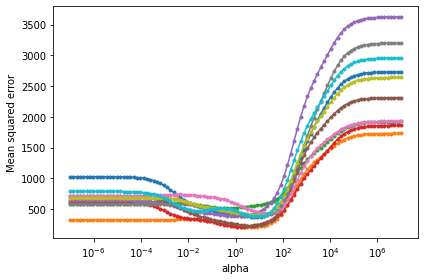

In [ ]:
plt.plot(alphas, mse_cv.T, '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We also plot the average across folds:

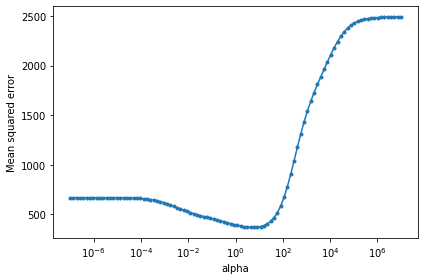

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

What is the optimal $\alpha$? Is it similar to the one found on the test set? Do the cross-validation MSE and the test-set MSE match well or differ strongly?

The optimal $\alpha$ in our CV experiment seems to be again be somewhere between $10^1$ and $10^2$, so somewhere ~40 (hard to tell exactly from the plot), which is a similar result as we got before.

We will now run cross-validation on the full training data. This will take a moment, depending on the speed of your computer. Afterwards, we will again plot the mean CV curves for the full data set (blue) and the small data set (orange).

In [ ]:
alphas = np.logspace(-7, 7, 100)
mse_cv_full = ridgeCV(X_train_full, y_train_full, n_folds=10, alphas=alphas)

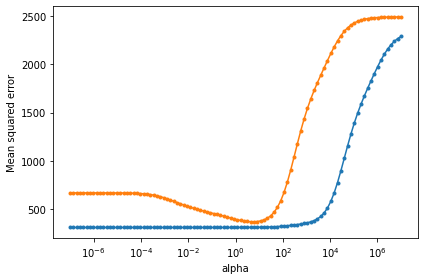

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We zoom in on the blue curve to the very left:

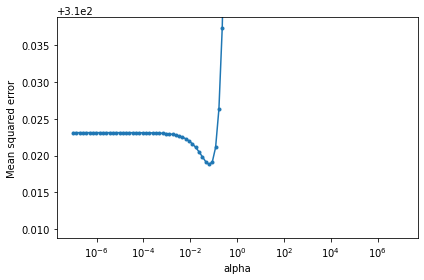

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.xscale('log')
minValue = np.min(np.mean(mse_cv_full, axis=0))
plt.ylim([minValue-.01, minValue+.02])
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

Why does the CV curve on the full data set look so different? What is the optimal value of $\alpha$ and why is it so much smaller than on the small training set?

On the full data, we get an optimal value of slightly below 0.1 (or $10^{-1}$) for $\alpha$, which is much smaller than the ~40 we got on the small training set. This could be because our first training set was very small at 200 observations and thus our model had to be regularized heavily (i.e. $\alpha$ large) in order to make good predictions on our current hold-out set in the cross-validation. When training a model on more data points, the model is not influenced as heavily by single observations and thus does not have to be regularized to make good predictions on the new data in the hold-out set.